# Scratchpad Analysis Notebook


## Import Libraries

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf #data gathering library

## Define some basic variables we will use for later

In [2]:
START = "2019-07-01"
# END = "2023-03-05"
END = "2022-06-30"

sectors = {
    "Communication": "IYZ",
    "Consumer Discretionary" : "XLY",
    "Consumer Staples": "XLP",
    "Energy": "XLE", 
    "Financial": "XLF", 
    "Healthcare": "XLV",
    "Industrial": "XLI",
    "Materials": "XLB",
    "Real Estate": "VNQ", 
    "Technology": "XLK",
    "Utilities": "XLU"
}

## Download market data from Yahoo Finance and store in unique dataframes

In [56]:
df_spy = yf.download("SPY", start=START, end=END) # S&P500
df_bnd = yf.download("BND", start=START, end=END) # Bond Market
df_xly = yf.download("XLY", start=START, end=END) # Consumer Discretionary
df_xlv = yf.download("XLV", start=START, end=END) # Healthcare
df_xlk = yf.download("XLK", start=START, end=END) # Technology

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


## Perform some tests on the dataframe to check for anything weird

In [7]:
type(df_spy)

pandas.core.frame.DataFrame

In [57]:
len(df_spy)
# len(df_bnd)

756

In [5]:
df_spy.head(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-07-01,296.679993,296.920013,294.329987,295.660004,279.181091,78705600
2019-07-02,295.609985,296.489990,294.679993,296.429993,279.908234,61504500
2019-07-03,297.179993,298.820007,297.019989,298.799988,282.146149,40898900
2019-07-05,297.440002,298.640015,296.010010,298.459991,281.825104,51677300
2019-07-08,297.010010,298.260010,296.220001,296.820007,280.276459,45841800
2019-07-09,295.540009,297.519989,295.480011,297.190002,280.625885,41101300
2019-07-10,298.369995,299.660004,297.779999,298.609985,281.966705,58448500
2019-07-11,299.320007,299.579987,298.200012,299.309998,282.627716,50826100
2019-07-12,299.850006,300.730011,299.510010,300.649994,283.893036,40326000


In [6]:
df_spy.tail(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-06-15,377.359985,383.899994,372.119995,379.200012,374.305542,125666800
2022-06-16,370.510010,370.940002,364.079987,366.649994,361.917542,134473300
2022-06-17,365.510010,369.380005,362.170013,365.859985,362.697754,111113900
2022-06-21,371.890015,376.529999,371.809998,375.070007,371.828156,76811900
2022-06-22,370.619995,378.720001,370.179993,374.390015,371.154022,90059400
2022-06-23,376.640015,378.829987,372.890015,378.059998,374.792297,79292100
2022-06-24,381.399994,390.089996,381.369995,390.079987,386.708405,98050300
2022-06-27,391.049988,391.359985,387.440002,388.589996,385.231293,66009600
2022-06-28,390.230011,393.160004,380.529999,380.649994,377.359894,86548900


## Make some test plots
### Some variables we defined in the beginning can be used for things like plotting

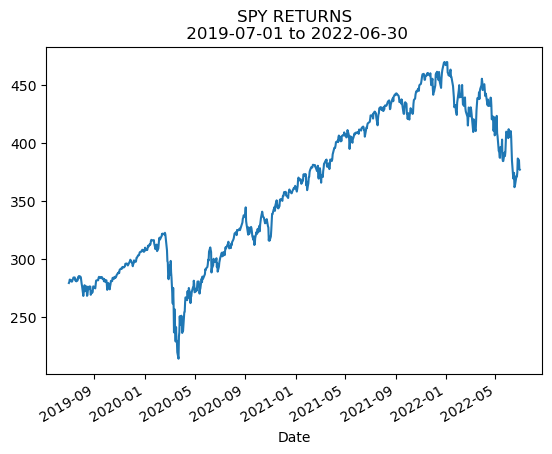

In [8]:
df_spy['Adj Close'].plot.line(title=("SPY RETURNS\n " + START + " to "+ END));

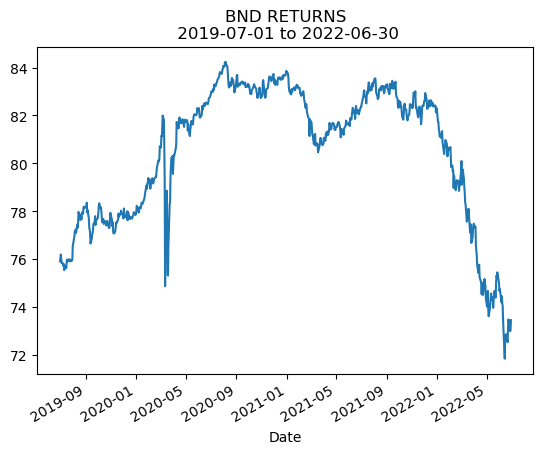

In [9]:
df_bnd['Adj Close'].plot.line(title=("BND RETURNS\n " + START + " to "+ END));

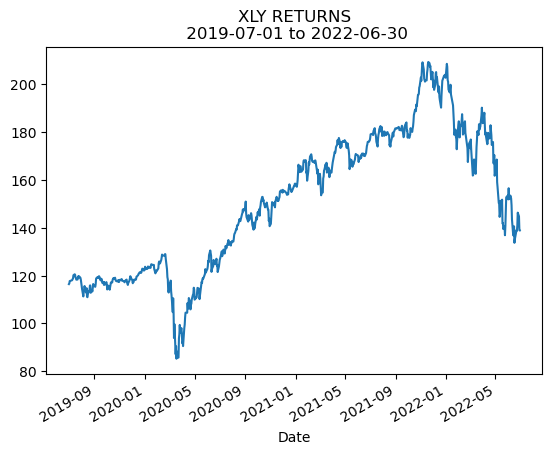

In [10]:
df_xly['Adj Close'].plot.line(title=("XLY RETURNS\n " + START + " to "+ END));

## Try making multidata plot

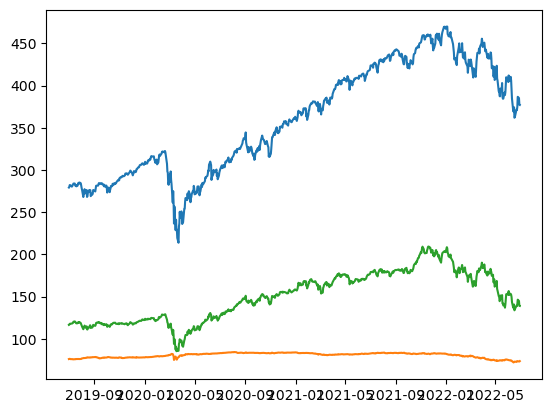

In [11]:
fig,ax = plt.subplots()
ax.plot(df_spy['Adj Close'],label="SPY")
ax.plot(df_bnd['Adj Close'],label="BND")
ax.plot(df_xly['Adj Close'],label="XLY")

## Make a new column in each dataframe showing the daily percent change in price

In [12]:
df_spy['pct_chg'] = df_spy['Adj Close'].pct_change()
df_bnd['pct_chg'] = df_bnd['Adj Close'].pct_change()
df_xly['pct_chg'] = df_xly['Adj Close'].pct_change()
df_xlv['pct_chg'] = df_xlv['Adj Close'].pct_change()
df_xlk['pct_chg'] = df_xlk['Adj Close'].pct_change()

## Try plotting the new column and perform a few other tests on it

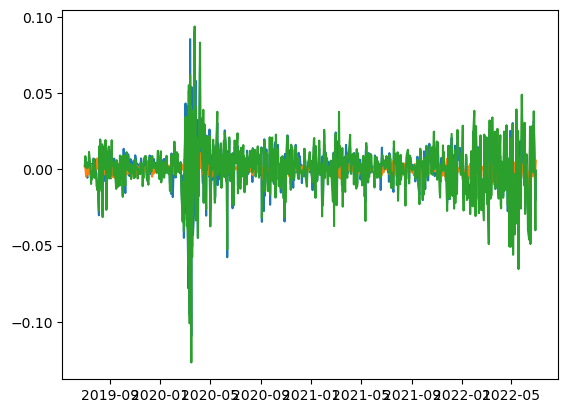

In [13]:
fig,ax = plt.subplots()
ax.plot(df_spy['pct_chg'],label="SPY")
ax.plot(df_bnd['pct_chg'],label="BND")
ax.plot(df_xly['pct_chg'],label="XLY")

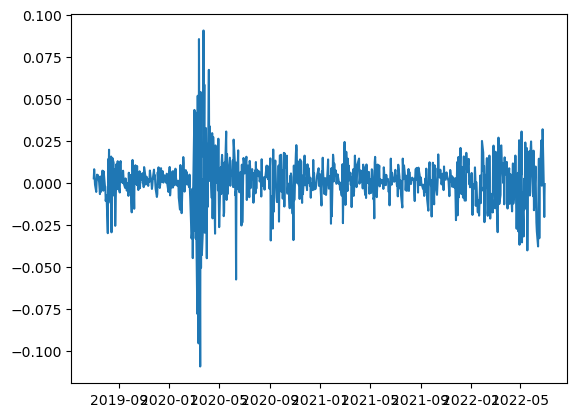

In [14]:
fig,ax = plt.subplots()
ax.plot(df_spy['pct_chg'],label="SPY")

In [15]:
df_spy['pct_chg']

Date
2019-07-01         NaN
2019-07-02    0.002605
2019-07-03    0.007995
2019-07-05   -0.001138
2019-07-08   -0.005495
                ...   
2022-06-23    0.009803
2022-06-24    0.031794
2022-06-27   -0.003820
2022-06-28   -0.020433
2022-06-29   -0.000814
Name: pct_chg, Length: 756, dtype: float64

## Make new "delta" column to use the percent change from 1.000 as a starting point

In [16]:
df_spy["delta"] = df_spy["pct_chg"]
df_spy["delta"] = df_spy["delta"]+1
df_spy["delta"].iloc[0] = 1
df_spy

C:\Users\Danqest\AppData\Local\Temp\ipykernel_38876\2682194000.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_spy["delta"].iloc[0] = 1


,Open,High,Low,Close,Adj Close,Volume,pct_chg,delta
Date,,,,,,,,
2019-07-01,296.679993,296.920013,294.329987,295.660004,279.181091,78705600,NaN,1.000000
2019-07-02,295.609985,296.489990,294.679993,296.429993,279.908234,61504500,0.002605,1.002605
2019-07-03,297.179993,298.820007,297.019989,298.799988,282.146149,40898900,0.007995,1.007995
2019-07-05,297.440002,298.640015,296.010010,298.459991,281.825104,51677300,-0.001138,0.998862
2019-07-08,297.010010,298.260010,296.220001,296.820007,280.276459,45841800,-0.005495,0.994505
...,...,...,...,...,...,...,...,...
2022-06-23,376.640015,378.829987,372.890015,378.059998,374.792297,79292100,0.009803,1.009803
2022-06-24,381.399994,390.089996,381.369995,390.079987,386.708405,98050300,0.031794,1.031794
2022-06-27,391.049988,391.359985,387.440002,388.589996,385.231293,66009600,-0.003820,0.996180


## Create a new column to show the percent change from 1.000 multiplicatively over time

In [18]:
df_spy["delta^2"] = df_spy["delta"]

In [19]:
for i in range(len(df_spy)):
    if i == 0:
        continue
#     print(row)
    diff = df_spy["delta^2"].iloc[i] * df_spy["delta^2"].iloc[i-1]
    df_spy["delta^2"].iloc[i] = diff
    
df_spy

C:\Users\Danqest\AppData\Local\Temp\ipykernel_38876\588518997.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_spy["delta^2"].iloc[i] = diff


,Open,High,Low,Close,Adj Close,Volume,pct_chg,delta,delta^2
Date,,,,,,,,,
2019-07-01,296.679993,296.920013,294.329987,295.660004,279.181091,78705600,NaN,1.000000,1.000000
2019-07-02,295.609985,296.489990,294.679993,296.429993,279.908234,61504500,0.002605,1.002605,1.002605
2019-07-03,297.179993,298.820007,297.019989,298.799988,282.146149,40898900,0.007995,1.007995,1.010621
2019-07-05,297.440002,298.640015,296.010010,298.459991,281.825104,51677300,-0.001138,0.998862,1.009471
2019-07-08,297.010010,298.260010,296.220001,296.820007,280.276459,45841800,-0.005495,0.994505,1.003924
...,...,...,...,...,...,...,...,...,...
2022-06-23,376.640015,378.829987,372.890015,378.059998,374.792297,79292100,0.009803,1.009803,1.342470
2022-06-24,381.399994,390.089996,381.369995,390.079987,386.708405,98050300,0.031794,1.031794,1.385153
2022-06-27,391.049988,391.359985,387.440002,388.589996,385.231293,66009600,-0.003820,0.996180,1.379862


## Test plot from new base of 1.000

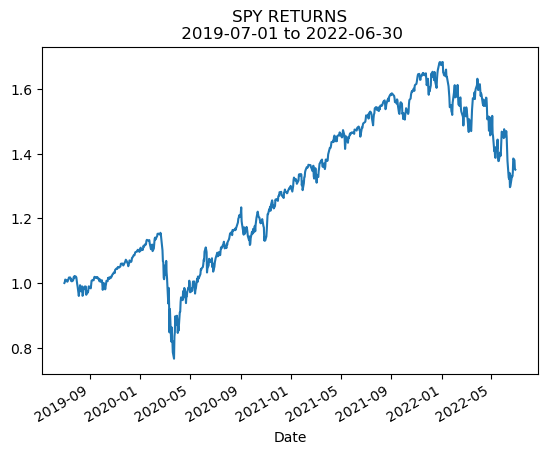

In [20]:
df_spy['delta^2'].plot.line(title=("SPY RETURNS\n " + START + " to "+ END));

## Perform same data cleaning to other dataframes and make test plots

In [21]:
df_bnd["delta"] = df_bnd["pct_chg"]
df_bnd["delta"] = df_bnd["delta"]+1
df_bnd["delta"].iloc[0] = 1

df_bnd["delta^2"] = df_bnd["delta"]

for i in range(len(df_bnd)):
    if i == 0:
        continue
#     print(row)
    diff = df_bnd["delta^2"].iloc[i] * df_bnd["delta^2"].iloc[i-1]
    df_bnd["delta^2"].iloc[i] = diff
    
df_bnd

C:\Users\Danqest\AppData\Local\Temp\ipykernel_38876\869619249.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bnd["delta"].iloc[0] = 1
C:\Users\Danqest\AppData\Local\Temp\ipykernel_38876\869619249.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bnd["delta^2"].iloc[i] = diff


,Open,High,Low,Close,Adj Close,Volume,pct_chg,delta,delta^2
Date,,,,,,,,,
2019-07-01,82.910004,82.949997,82.750000,82.870003,75.919655,2354400,NaN,1.000000,1.000000
2019-07-02,82.919998,83.059998,82.860001,83.029999,76.066254,3127100,0.001931,1.001931,1.001931
2019-07-03,83.110001,83.220001,83.080002,83.180000,76.203667,1720800,0.001806,1.001806,1.003741
2019-07-05,82.830002,82.849998,82.620003,82.790001,75.846382,2356800,-0.004689,0.995311,0.999035
2019-07-08,82.879997,82.919998,82.760002,82.779999,75.837196,1761500,-0.000121,0.999879,0.998914
...,...,...,...,...,...,...,...,...,...
2022-06-23,74.900002,75.330002,74.879997,74.970001,73.495811,8542600,0.004825,1.004825,0.968074
2022-06-24,74.860001,75.129997,74.779999,74.830002,73.358559,6979000,-0.001867,0.998133,0.966266
2022-06-27,74.540001,74.730003,74.389999,74.470001,73.005646,6238900,-0.004811,0.995189,0.961617


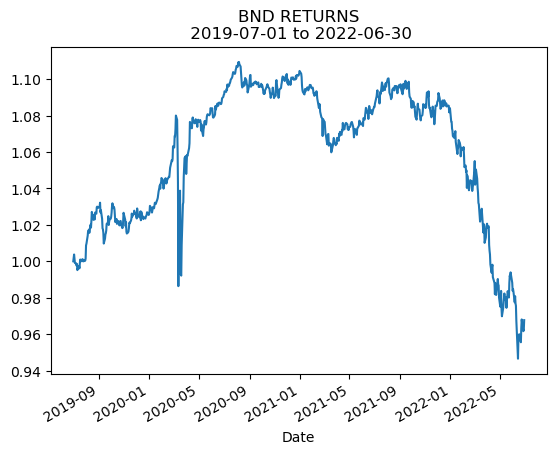

In [22]:
df_bnd['delta^2'].plot.line(title=("BND RETURNS\n " + START + " to "+ END));

In [23]:
df_xly["delta"] = df_xly["pct_chg"]
df_xly["delta"] = df_xly["delta"]+1
df_xly["delta"].iloc[0] = 1

df_xly["delta^2"] = df_xly["delta"]

for i in range(len(df_xly)):
    if i == 0:
        continue
#     print(row)
    diff = df_xly["delta^2"].iloc[i] * df_xly["delta^2"].iloc[i-1]
    df_xly["delta^2"].iloc[i] = diff
    
df_xly

C:\Users\Danqest\AppData\Local\Temp\ipykernel_38876\1312669654.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_xly["delta"].iloc[0] = 1
C:\Users\Danqest\AppData\Local\Temp\ipykernel_38876\1312669654.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_xly["delta^2"].iloc[i] = diff


,Open,High,Low,Close,Adj Close,Volume,pct_chg,delta,delta^2
Date,,,,,,,,,
2019-07-01,120.709999,121.260002,119.739998,120.250000,116.406448,4144700,NaN,1.000000,1.000000
2019-07-02,120.099998,120.570000,119.629997,120.510002,116.658134,9008500,0.002162,1.002162,1.002162
2019-07-03,120.870003,121.559998,120.639999,121.559998,117.674568,1809600,0.008713,1.008713,1.010894
2019-07-05,120.980003,121.809998,120.650002,121.699997,117.810097,3377500,0.001152,1.001152,1.012058
2019-07-08,121.320000,121.949997,121.199997,121.849998,117.955284,5074600,0.001232,1.001232,1.013305
...,...,...,...,...,...,...,...,...,...
2022-06-23,140.389999,141.970001,138.470001,141.589996,140.907974,5888700,0.015710,1.015710,1.210483
2022-06-24,142.600006,147.039993,141.929993,146.990005,146.281982,6702300,0.038138,1.038138,1.256648
2022-06-27,147.710007,148.470001,144.979996,145.449997,144.749390,7287100,-0.010477,0.989523,1.243483


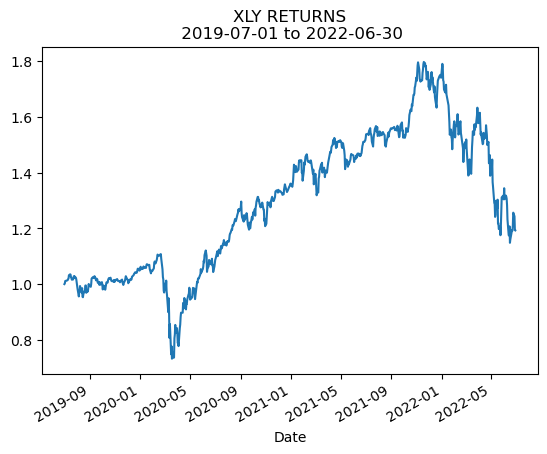

In [24]:
df_xly['delta^2'].plot.line(title=("XLY RETURNS\n " + START + " to "+ END));

C:\Users\Danqest\AppData\Local\Temp\ipykernel_38876\1753295884.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_xlv["delta"].iloc[0] = 1
C:\Users\Danqest\AppData\Local\Temp\ipykernel_38876\1753295884.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_xlv["delta^2"].iloc[i] = diff


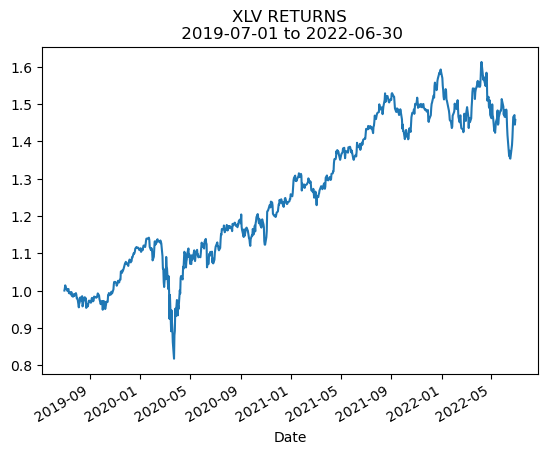

In [25]:
df_xlv["delta"] = df_xlv["pct_chg"]
df_xlv["delta"] = df_xlv["delta"]+1
df_xlv["delta"].iloc[0] = 1

df_xlv["delta^2"] = df_xlv["delta"]

for i in range(len(df_xly)):
    if i == 0:
        continue
#     print(row)
    diff = df_xlv["delta^2"].iloc[i] * df_xlv["delta^2"].iloc[i-1]
    df_xlv["delta^2"].iloc[i] = diff
    
df_xlv['delta^2'].plot.line(title=("XLV RETURNS\n " + START + " to "+ END));

C:\Users\Danqest\AppData\Local\Temp\ipykernel_38876\4087668583.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_xlk["delta"].iloc[0] = 1
C:\Users\Danqest\AppData\Local\Temp\ipykernel_38876\4087668583.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_xlk["delta^2"].iloc[i] = diff


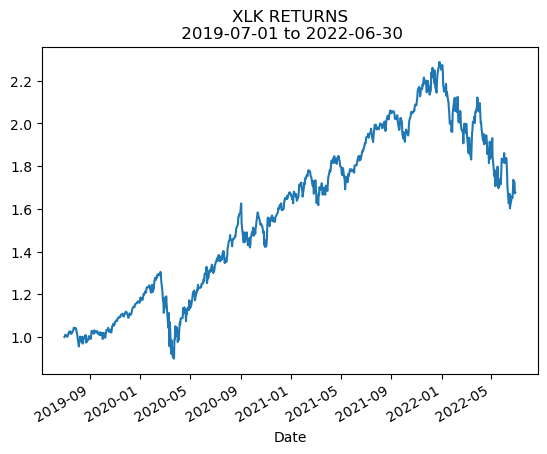

In [26]:
df_xlk["delta"] = df_xlk["pct_chg"]
df_xlk["delta"] = df_xlk["delta"]+1
df_xlk["delta"].iloc[0] = 1

df_xlk["delta^2"] = df_xlk["delta"]

for i in range(len(df_xlk)):
    if i == 0:
        continue
#     print(row)
    diff = df_xlk["delta^2"].iloc[i] * df_xlk["delta^2"].iloc[i-1]
    df_xlk["delta^2"].iloc[i] = diff
    
df_xlk['delta^2'].plot.line(title=("XLK RETURNS\n " + START + " to "+ END));

## Plot all dataframes on a single chart with new base of 1.000

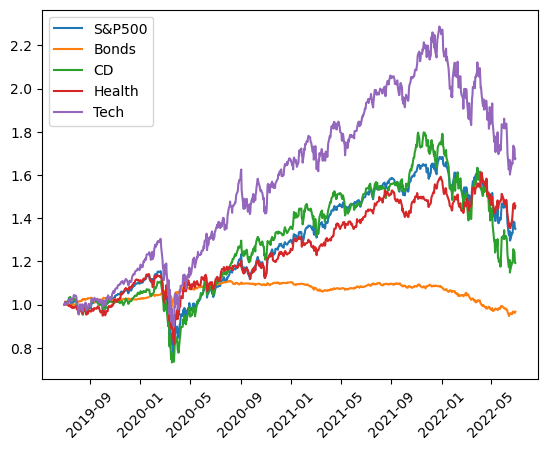

In [34]:
fig,ax = plt.subplots()
plt.xticks(rotation=45)
ax.plot(df_spy['delta^2'],label="SPY")
ax.plot(df_bnd['delta^2'],label="BND")
ax.plot(df_xly['delta^2'],label="XLY")
ax.plot(df_xlv['delta^2'],label="XLV")
ax.plot(df_xlk['delta^2'],label="XLK")
plt.legend(['S&P500', 'Bonds', 'CD', 'Health', 'Tech'])

## Test some correlations between the datasets

In [48]:
df_corr1 = pd.DataFrame(df_spy["delta^2"])
# df_corr2 = pd.DataFrame(df_xlk["delta^2"])
df_corr2 = pd.DataFrame(df_bnd["delta^2"])


df_corr1.corrwith(df_corr2, method="spearman")

delta^2    0.219147
dtype: float64